In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data_train = pd.read_csv("heart.csv")

In [3]:
data_train.shape

(1025, 14)

In [4]:
data_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
total = data_train.isnull().sum().sort_values(ascending=False)
vv = ((data_train.isnull().sum()) / len(data_train)).sort_values(ascending=False)

In [6]:
vv

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [7]:
x_df_train= data_train.drop(['target'], axis = 1)
y_df_train = data_train['target']

In [8]:
y_df_train

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [9]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x_df_train)


In [10]:
X

array([[0.47916667, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.4375    , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y_df_train, test_size=0.15, random_state=42)

In [12]:
X_train=X_train.reshape(871, 13,1)
X_val=X_val.reshape(154, 13,1)

In [13]:
X_train.shape


(871, 13, 1)

In [14]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras import regularizers

In [15]:
model = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(13,)),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
28/28 [==============================] - 7s 166ms/step - loss: 15.9060 - accuracy: 0.7773 - val_loss: 5.3094 - val_accuracy: 0.8247
Epoch 2/100
28/28 [==============================] - 3s 97ms/step - loss: 2.5431 - accuracy: 0.8117 - val_loss: 0.9925 - val_accuracy: 0.8182
Epoch 3/100
28/28 [==============================] - 3s 106ms/step - loss: 0.7189 - accuracy: 0.8255 - val_loss: 0.5917 - val_accuracy: 0.8312
Epoch 4/100
28/28 [==============================] - 3s 102ms/step - loss: 0.5728 - accuracy: 0.8255 - val_loss: 0.5809 - val_accuracy: 0.8182
Epoch 5/100
28/28 [==============================] - 3s 100ms/step - loss: 0.5311 - accuracy: 0.8542 - val_loss: 0.5402 - val_accuracy: 0.8442
Epoch 6/100
28/28 [==============================] - 3s 99ms/step - loss: 0.5418 - accuracy: 0.8450 - val_loss: 0.5573 - val_accuracy: 0.8442
Epoch 7/100
28/28 [==============================] - 3s 107ms/step - loss: 0.5384 - accuracy: 0.8312 - val_loss: 0.5362 - val_accuracy: 0.8377


In [17]:
val_loss , val_acc = model.evaluate (X_val,y_val)

5/5 [==============================] - 0s 23ms/step - loss: 0.4846 - accuracy: 0.8636


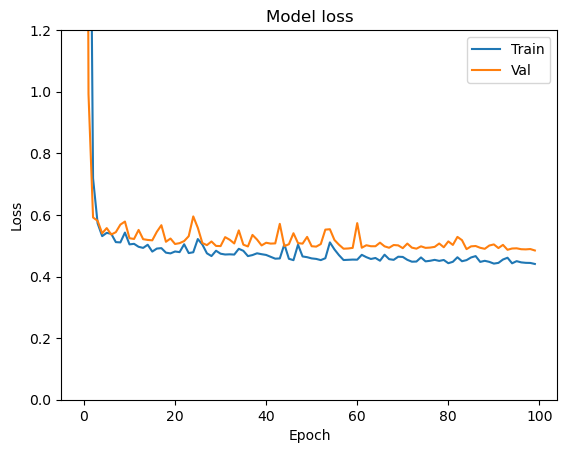

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

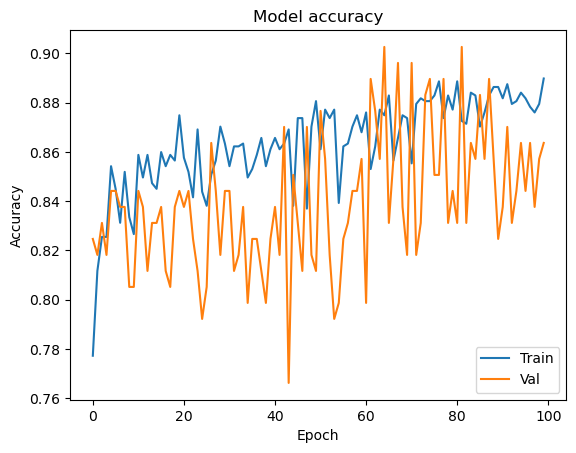

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()